# Datenbeschreibung – IMDB Movies Dataset

In diesem Notizbuch bereite ich das IMDB Movies Dataset für die programmatische Verarbeitung vor und dokumentiere meine Erkenntnisse.  
Ziel ist es, Vorhersagen für den **Revenue** (Einnahmen) eines Films zu treffen.


## 1. Zielvariable

Für dieses Projekt möchte ich den **Revenue** (Einnahmen) vorhersagen.  
Dieser Wert hängt häufig von anderen Variablen wie Budget, Popularität und Bewertungen ab.


## 2. Statistische Analyse

In diesem Abschnitt berechne ich wichtige Kennzahlen für die numerischen Felder  
des Datensatzes, wie z. B. Median und Standardabweichung.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datensatz laden
df = pd.read_csv('data/imdb_dataset.csv')  # relativer Pfad aus notebooks/

# Erste Einblicke
print("Erste Zeilen des Datensatzes:")
display(df.head())

# Deskriptive Statistik
print("Deskriptive Statistik:")
display(df.describe())

# Median berechnen
print("Median-Werte:")
median_values = df.median(numeric_only=True)
display(median_values)

# Standardabweichung berechnen
print("Standardabweichung:")
std_values = df.std(numeric_only=True)
display(std_values)


Erste Zeilen des Datensatzes:


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


Deskriptive Statistik:


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Median-Werte:


id              20669.000000
popularity          0.383856
budget              0.000000
revenue             0.000000
runtime            99.000000
vote_count         38.000000
vote_average        6.000000
release_year     2006.000000
budget_adj          0.000000
revenue_adj         0.000000
dtype: float64

Standardabweichung:


id              9.213014e+04
popularity      1.000185e+00
budget          3.091321e+07
revenue         1.170035e+08
runtime         3.138141e+01
vote_count      5.756191e+02
vote_average    9.351418e-01
release_year    1.281294e+01
budget_adj      3.430616e+07
revenue_adj     1.446325e+08
dtype: float64

## 3. Grafische Darstellung

Ich erstelle ein Histogramm für **budget** und ein Streudiagramm für **budget vs. revenue**,  
um Verteilungen und Zusammenhänge zu visualisieren.


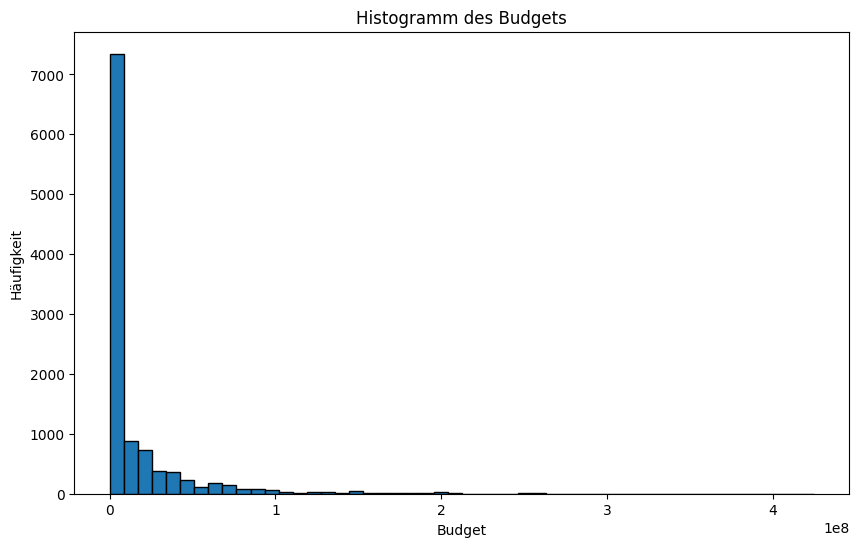

In [3]:
plt.figure(figsize=(10,6))
plt.hist(df['budget'].dropna(), bins=50, edgecolor='black')
plt.title('Histogramm des Budgets')
plt.xlabel('Budget')
plt.ylabel('Häufigkeit')
plt.show()


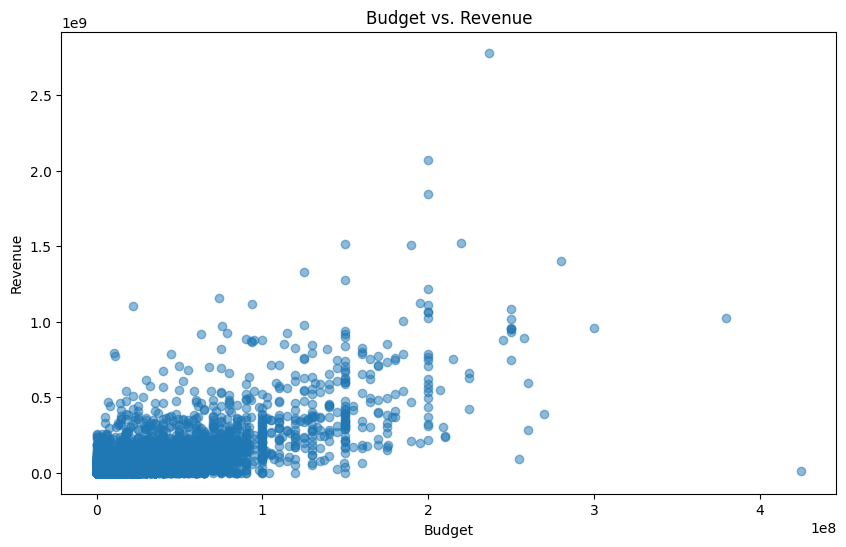

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


## 4. Skalierung eines Datenfeldes

Ich skaliere das **budget**-Feld, um große Schwankungen zu reduzieren und  
numerische Stabilität für ML-Modelle zu gewährleisten.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['budget_scaled'] = scaler.fit_transform(df[['budget']])

print("Vergleich original vs. skaliert:")
display(df[['budget', 'budget_scaled']].head())


Vergleich original vs. skaliert:


,budget,budget_scaled
0,150000000,4.379374
1,150000000,4.379374
2,110000000,3.085370
3,200000000,5.996880
4,190000000,5.673379


### 4.1 Kommentar zur Skalierung

Die Standardisierung des Budgets ist notwendig, weil unser Datensatz  
starke Ausreißer (sehr hohe Budgets) enthält.  
Durch die Skalierung werden alle Werte vergleichbar, das Modell wird  
weniger von extremen Werten dominiert und trainiert stabiler.


# Zusammenfassung

- **Zielvariable**: Revenue.
- **Kennzahlen**: Median & Standardabweichung.
- **Visualisierungen**: Histogramm und Streudiagramm.
- **Feature-Engineering**: Skalierung des Feldes `budget`.
- Alle Schritte sind klar dokumentiert für die weitere Modellierung.
